# Formatting Chat Room

Pesan perlu di format terlebih dahulu dan membagi menjadi 3 bagian yaitu `tanggal`, `nama orang`, dan `pesan`

Isi pesan juga perlu difilter, sebagai contoh pesan dibawah ini : 

```
06/04/19 05.45 - Pesan dan panggilan terenkripsi secara end-to-end. Tidak seorang pun di luar chat ini yang dapat membaca atau mendengarkannya, bahkan WhatsApp. Ketuk untuk info selengkapnya.
06/03/19 21.19 - ‎Monika (Ti 17b) telah membuat grup "TEKNIK INFORMATIKA 17B"
06/03/19 21.19 - Anda telah ditambahkan
06/04/19 17.48 - Rio chandra, A.Md. Kom.: Pengumuman Finalis Pilmapres Polbeng Tahun 2019.
06/04/19 17.48 - Rio chandra, A.Md. Kom.: <Media tidak disertakan>
06/04/19 18.59 - Rio chandra, A.Md. Kom.: Yang pergi nengok ustad Abdul Somad siapa ?
06/04/19 18.59 - Rio chandra, A.Md. Kom.: Yoklah
```

Hanya ambil pesan yang memiliki nama pengirim saja.

Contoh baris yang **tidak diambil**

06/03/19 21.19 - Anda telah ditambahkan

06/04/19 05.45 - Pesan dan panggilan terenkripsi secara end-to-end. Tidak seorang pun di luar chat ini yang dapat membaca atau mendengarkannya, bahkan WhatsApp. Ketuk untuk info selengkapnya.

06/03/19 21.19 - ‎Monika (Ti 17b) telah membuat grup "TEKNIK INFORMATIKA 17B"

Contoh baris yang **diambil**

06/04/19 18.59 - Rio chandra, A.Md. Kom.: Yang pergi nengok ustad Abdul Somad siapa ?

06/04/19 18.59 - Rio chandra, A.Md. Kom.: Yoklah

In [1]:
import datetime
import matplotlib.pyplot as plt

db_chat = "../db_chat_wa.txt"
f = open(db_chat, "rt", encoding="utf8")
list_chat = []
last_index = None
last_line = None
i = 0
for line in f.readlines():
    i += 1
    if len(line) > 15 and line[15] == "-" and len(line.split(' - ')) >= 2:
        if last_line is not None:
            list_chat[-1][2] = last_line
            last_line = None
        split1 = line.split(':')
        if(len(split1) >= 2):
            text_message = split1[1] if len(split1) > 0 else ''
            split2 = split1[0].split(' - ')
            date = split2[0]
            date_parsed = datetime.datetime.strptime(date, '%d/%m/%y %H.%M')
            person = split2[1]
            list_chat.append([
                date_parsed,
                person,
                text_message
            ])
            last_line = text_message
    else:
        if last_line is None:
            last_line = ''
        last_line = last_line + "\n" + line

print(len(list_chat))

22425


In [2]:
first_message = list_chat[0][0].strftime("%d/%m/%Y")
last_message = list_chat[-1][0].strftime("%d/%m/%Y")

print("Database ini berisi dari tanggal {} hingga tanggal {}".format(first_message, last_message))
print("jumlah pesan : {}".format(len(list_chat)))

Database ini berisi dari tanggal 06/04/2019 hingga tanggal 03/01/2021
jumlah pesan : 22425


# Top
## Top Person chat

Mencari jumlah pesan yang dikirim oleh setiap orang


In [3]:
top_person = {}
for date, person, chat in list_chat:
    if((person in top_person) is False):
        top_person[person] = 1
    else:
        top_person[person] += 1
        
sorted_top_person = {k: v for k, v in sorted(top_person.items(), key=lambda item: item[1],reverse=True)}
for nama in sorted_top_person:
    print("{} mengirim {} pesan".format(nama,sorted_top_person[nama]))

Rio chandra, A.Md. Kom. mengirim 4335 pesan
Hudri (Ti 17b) mengirim 2610 pesan
Kurniawan (Ti 17b) mengirim 1972 pesan
Yesi (Ti 17b) mengirim 1558 pesan
Rojer 2 (Ti 17b) mengirim 1321 pesan
Ali Imran (Ti 17b) mengirim 1315 pesan
Yudi (Ti 17b) mengirim 1002 pesan
Yogi (Ti 17b) mengirim 957 pesan
Bagus (Ti 17b) mengirim 941 pesan
Jagad (Ti 17b) mengirim 735 pesan
Wawan (Ti 17b) mengirim 615 pesan
Monika 2(Ti 17b) mengirim 546 pesan
Agus (Ti 17b) mengirim 448 pesan
Umi (Ti 17b) mengirim 445 pesan
Syafiq (Ti 17b) mengirim 438 pesan
Wiwit (2) mengirim 418 pesan
Marsidi (Ti 17b) mengirim 365 pesan
Fitria (Ti 17b) mengirim 358 pesan
Ipit (Ti 17b) mengirim 358 pesan
Ika (Ti 17b) mengirim 245 pesan
Theresia (Ti 17b) mengirim 241 pesan
Ali Imran2 (Ti 17b) mengirim 213 pesan
Ngestu (Ti 17b) mengirim 146 pesan
Fika (Ti 17b) mengirim 142 pesan
Shellya 2 (Ti 17b) mengirim 131 pesan
Toni (Ti 17b) mengirim 113 pesan
Nurhusna (Ti 17b) mengirim 108 pesan
Julia (Ti 17b) mengirim 102 pesan
Julia Sm (Ti 17b

### Grafik persentase jumlah pesan setiap orang

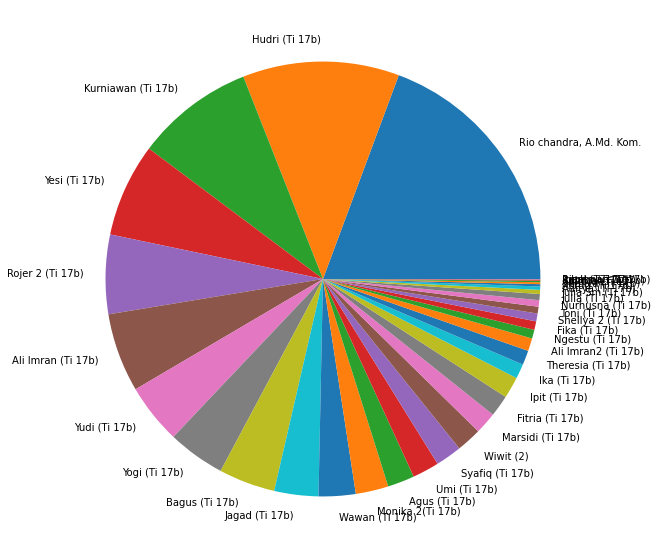

In [5]:
plt.figure(figsize=(10,10)) 
plt.pie(sorted_top_person.values(), labels=sorted_top_person.keys())
plt.show()

## Jumlah Kata setiap orang

In [6]:
media_chat = " <Media tidak disertakan>\n"
words_person = {}
for _,person,chat in list_chat:
    if chat == media_chat:
        continue
    if person in words_person:
        words_person[person] += len(chat.split(' '))
    else:
        words_person[person] = len(chat.split(' '))

sorted_word_person = {k: v for k, v in sorted(words_person.items(), key=lambda item: item[1], reverse=True)}
for nama in sorted_word_person:
    print("{} mengirim {} Kata".format(nama,sorted_word_person[nama]))

Hudri (Ti 17b) mengirim 27436 Kata
Rio chandra, A.Md. Kom. mengirim 26321 Kata
Yesi (Ti 17b) mengirim 13882 Kata
Kurniawan (Ti 17b) mengirim 7386 Kata
Rojer 2 (Ti 17b) mengirim 6968 Kata
Ali Imran (Ti 17b) mengirim 6854 Kata
Yudi (Ti 17b) mengirim 5383 Kata
Bagus (Ti 17b) mengirim 5024 Kata
Yogi (Ti 17b) mengirim 4274 Kata
Wiwit (2) mengirim 4170 Kata
Monika 2(Ti 17b) mengirim 3353 Kata
Umi (Ti 17b) mengirim 3332 Kata
Agus (Ti 17b) mengirim 2804 Kata
Syafiq (Ti 17b) mengirim 2739 Kata
Ipit (Ti 17b) mengirim 2646 Kata
Wawan (Ti 17b) mengirim 2369 Kata
Jagad (Ti 17b) mengirim 2267 Kata
Fitria (Ti 17b) mengirim 2146 Kata
Theresia (Ti 17b) mengirim 1731 Kata
Marsidi (Ti 17b) mengirim 1682 Kata
Ika (Ti 17b) mengirim 1479 Kata
Fika (Ti 17b) mengirim 1364 Kata
Ngestu (Ti 17b) mengirim 1178 Kata
Toni (Ti 17b) mengirim 973 Kata
Ali Imran2 (Ti 17b) mengirim 930 Kata
Nurhusna (Ti 17b) mengirim 896 Kata
Aditya (Ti 17b) mengirim 727 Kata
Shellya 2 (Ti 17b) mengirim 579 Kata
Julia (Ti 17b) mengirim 

### Grafik jumlah kata perorang

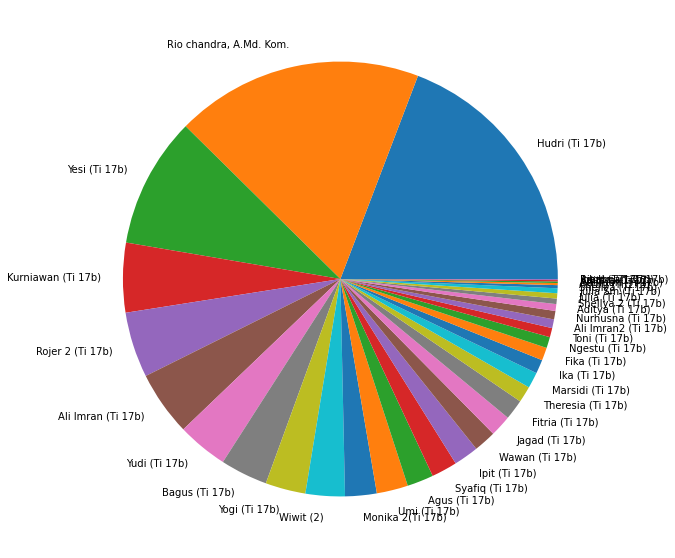

In [7]:
plt.figure(figsize=(10,10)) 
plt.pie(sorted_word_person.values(), labels=sorted_word_person.keys())
plt.show()

## Get Total Message per day

In [9]:
activity_perday = {}

for date, person, chat in list_chat:
    if date.date() in activity_perday:
        activity_perday[date.date()] += 1
    else:
        activity_perday[date.date()] = 1

for date in activity_perday:
    display_date = "{}-{}-{}".format(date.day, date.month, date.year)
    print("{} : {}".format(display_date, activity_perday[date]))

6-4-2019 : 13
7-4-2019 : 37
8-4-2019 : 29
9-4-2019 : 67
10-4-2019 : 32
11-4-2019 : 78
12-4-2019 : 32
13-4-2019 : 15
14-4-2019 : 35
15-4-2019 : 53
16-4-2019 : 64
17-4-2019 : 22
18-4-2019 : 61
19-4-2019 : 21
20-4-2019 : 2
21-4-2019 : 38
22-4-2019 : 58
23-4-2019 : 22
24-4-2019 : 92
25-4-2019 : 216
26-4-2019 : 18
27-4-2019 : 42
28-4-2019 : 39
29-4-2019 : 23
30-4-2019 : 68
1-5-2019 : 7
2-5-2019 : 112
3-5-2019 : 132
4-5-2019 : 42
5-5-2019 : 18
6-5-2019 : 55
7-5-2019 : 62
8-5-2019 : 40
9-5-2019 : 43
10-5-2019 : 28
11-5-2019 : 43
12-5-2019 : 29
13-5-2019 : 16
14-5-2019 : 51
15-5-2019 : 120
16-5-2019 : 104
17-5-2019 : 90
18-5-2019 : 56
19-5-2019 : 92
20-5-2019 : 126
21-5-2019 : 29
22-5-2019 : 80
23-5-2019 : 21
24-5-2019 : 26
25-5-2019 : 92
26-5-2019 : 29
27-5-2019 : 13
28-5-2019 : 56
29-5-2019 : 59
30-5-2019 : 27
31-5-2019 : 7
4-6-2019 : 23
5-6-2019 : 17
7-6-2019 : 26
8-6-2019 : 1
9-6-2019 : 109
10-6-2019 : 13
11-6-2019 : 45
12-6-2019 : 25
13-6-2019 : 106
14-6-2019 : 228
15-6-2019 : 22
16-6-201

### Get total Message Per month

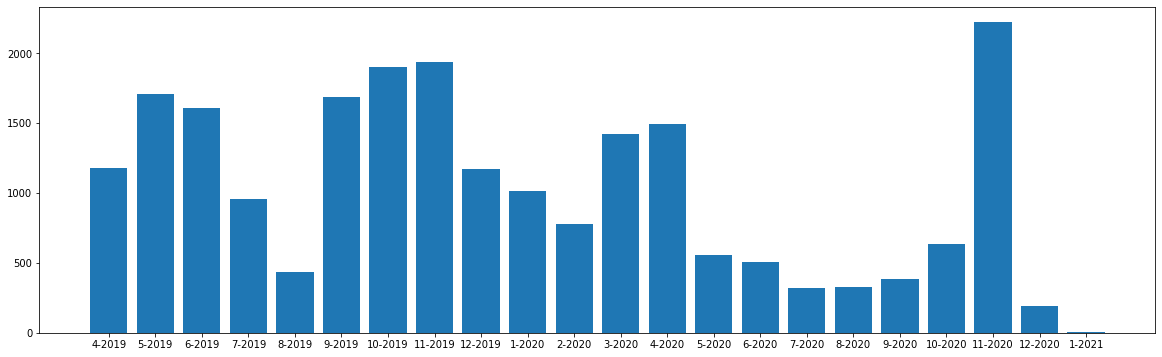

In [10]:
activity_permonth = {}

for date, person, chat in list_chat:
    month = "{}-{}".format(date.date().month, date.date().year)
    if month in activity_permonth:
        activity_permonth[month] += 1
    else:
        activity_permonth[month] = 1

plt.figure(figsize=(20,6))        
plt.bar(activity_permonth.keys(), activity_permonth.values())
plt.show()

## 20 Dates the most chat

20 tanggal dengan Chat terbanyak dalam sehari

In [11]:
sorted_activity = {k: v for k, v in sorted(activity_perday.items(), key=lambda item: item[1], reverse=True)}
max_display = 20
i = 1
for date in sorted_activity:
    if (i == max_display):
        break
    display_date = "{}/{}/{}".format(date.day, date.month, date.year)
    print("{} : {} pesan".format(display_date, activity_perday[date]))
    i += 1

23/11/2020 : 463 pesan
21/11/2019 : 355 pesan
19/11/2019 : 345 pesan
13/7/2019 : 278 pesan
11/9/2019 : 275 pesan
8/11/2020 : 254 pesan
14/6/2019 : 228 pesan
13/4/2020 : 228 pesan
13/11/2020 : 222 pesan
25/4/2019 : 216 pesan
15/3/2020 : 201 pesan
18/9/2019 : 194 pesan
22/1/2020 : 162 pesan
14/4/2020 : 160 pesan
27/3/2020 : 156 pesan
16/6/2019 : 154 pesan
7/10/2019 : 152 pesan
15/1/2020 : 152 pesan
23/9/2019 : 151 pesan


## Most Chat based time

Jumlah pesan yang dikirim setiap jam

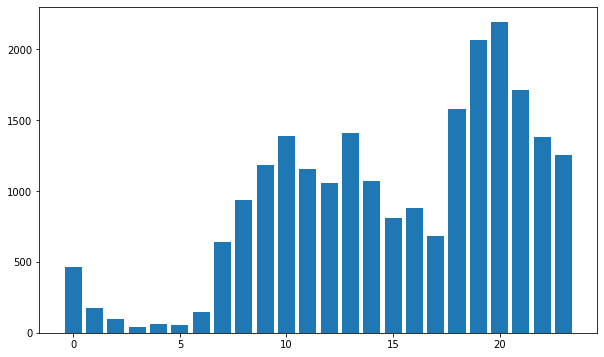

In [12]:
list_time_chat = {}
for i in range(24):
    list_time_chat[i] = 0

for date,_,_ in list_chat:
    if date.time().hour in list_time_chat:
        list_time_chat[date.time().hour] += 1
    else:
        list_time_chat[date.time().hour] = 1
plt.figure(figsize=(10,6))        
plt.bar(list_time_chat.keys(), list_time_chat.values())
plt.show()

## Word Cloud

Awan kata, kata yang sering digunakan didalam group chat tersebut

In [17]:
from wordcloud import WordCloud, STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

new_list = " ".join([stemmer.stem(chat) for _,_,chat in list_chat if chat != " <Media tidak disertakan>\n"])

wc_img = WordCloud().generate(new_list)

plt.figure(figsize=(200,200))
plt.imshow(wc_img)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

## Most Commonly Word Based Author

### WordCloud From the top person chat

In [18]:
def wc_word_author(name):
    print('Wordcloud {}'.format(name))
    word_person = []
    for _,person,chat in list_chat:
        if(person == name and chat != media_chat):
            word_person += chat.split(' ')
    wc_img = WordCloud().generate(''.join(word_person))
    
    plt.figure(figsize=(200,200))
    plt.imshow(wc_img)
    plt.axis('off')
    plt.title(name)
    
wc_word_author(list(sorted_top_person.keys())[0])

Wordcloud Rio chandra, A.Md. Kom.


## Jam aktif per orang

Jam aktif Rio chandra, A.Md. Kom.


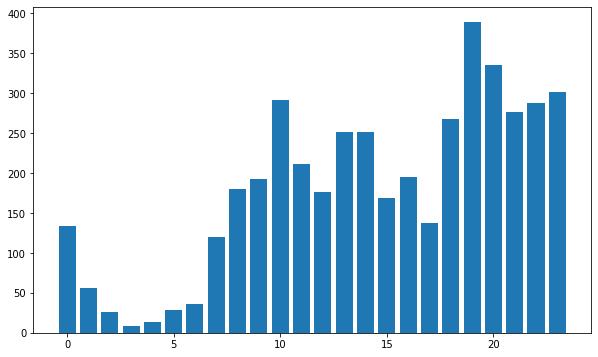

In [19]:
def hours_active(name):
    print("Jam aktif {}".format(name))
    list_hour = {}
    for date,person,chat in list_chat:
        if person == name:
            if date.time().hour in list_hour:
                list_hour[date.time().hour] += 1
            else:
                list_hour[date.time().hour] = 1
    plt.figure(figsize=(10,6))        
    plt.bar(list_hour.keys(), list_hour.values())
    plt.show()

hours_active(list(sorted_top_person.keys())[0])

## Average Per Message

### Average Word Permessage

In [20]:
media_chat = " <Media tidak disertakan>\n"

words_permessage = [len(chat.split(' ')) for _,_,chat in list_chat if chat != media_chat]
letters_permessage = [len(chat.split()) for _,_,chat in list_chat if chat != media_chat]

average_word = sum(words_permessage)/len(list_chat)
average_letters = sum(letters_permessage)/len(list_chat)
print('Total kata : {}'.format(sum(words_permessage)))
print('Total huruf : {}'.format(sum(letters_permessage)))
print('Rata-rata kata dalam 1 pesan :  {}'.format(average_word))
print('Rata-rata huruf dalam 1 pesan : {}'.format(average_letters))

Total kata : 142949
Total huruf : 127694
Rata-rata kata dalam 1 pesan :  6.37453734671126
Rata-rata huruf dalam 1 pesan : 5.694269788182831


## Average Message perday

In [21]:
message_perday = sum([val for val in activity_perday.values()])/len(activity_perday.keys())
print('Rata-rata pesan dalam sehari : {}'.format(message_perday))

Rata-rata pesan dalam sehari : 40.478339350180505


## Emoji yang sering digunakan

In [22]:
from emoji import UNICODE_EMOJI

list_emoji = {}
for date, person, chat in list_chat:
    split_chat = chat.split()
    for word in split_chat:
        if word in UNICODE_EMOJI:
            if word in list_emoji:
                list_emoji[word] += 1
            else:
                list_emoji[word] = 1

sorted_list_emoji = {k:v for k,v in sorted(list_emoji.items(), key=lambda item: item[1], reverse=True)}
for key in sorted_list_emoji:
    print("emoji {} sebanyak {} kali".format(key, list_emoji[key]))

emoji 🤣 sebanyak 100 kali
emoji 😂 sebanyak 72 kali
emoji 👍🏻 sebanyak 27 kali
emoji 👍 sebanyak 26 kali
emoji 😅 sebanyak 25 kali
emoji 🤔 sebanyak 23 kali
emoji 🙄 sebanyak 22 kali
emoji 😑 sebanyak 21 kali
emoji 🥺 sebanyak 21 kali
emoji 😁 sebanyak 20 kali
emoji 😊 sebanyak 18 kali
emoji 🙏🏻 sebanyak 17 kali
emoji 😌 sebanyak 17 kali
emoji 🤭 sebanyak 15 kali
emoji 😭 sebanyak 15 kali
emoji 🙏 sebanyak 14 kali
emoji 😎 sebanyak 14 kali
emoji 😇 sebanyak 13 kali
emoji 😚 sebanyak 13 kali
emoji 😘 sebanyak 13 kali
emoji 🙃 sebanyak 13 kali
emoji 🥴 sebanyak 8 kali
emoji 😃 sebanyak 7 kali
emoji 🥳 sebanyak 7 kali
emoji 🌝 sebanyak 7 kali
emoji 🕧 sebanyak 6 kali
emoji 😴 sebanyak 6 kali
emoji 🐒 sebanyak 6 kali
emoji ✊ sebanyak 6 kali
emoji 😗 sebanyak 6 kali
emoji 😶 sebanyak 5 kali
emoji 🤗 sebanyak 5 kali
emoji 🙂 sebanyak 5 kali
emoji 😙 sebanyak 5 kali
emoji 👌 sebanyak 5 kali
emoji 💩 sebanyak 5 kali
emoji 😒 sebanyak 5 kali
emoji ❓ sebanyak 5 kali
emoji 😥 sebanyak 5 kali
emoji 👌🏻 sebanyak 5 kali
emoji 😏 sebanya